<a href="https://colab.research.google.com/github/Akshatpattiwar512/Data-Cleaning/blob/main/India_Air_Quality_Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv('data.csv', encoding='mac_roman')
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80122,776.0,10-03-15,Goa,Ponda,Goa State Pollution Control Board,"Residential, Rural and other Areas",5.0,10.0,78.0,NaN,Ponda Town,28.0,2015-03-10
80123,776.0,12-03-15,Goa,Ponda,Goa State Pollution Control Board,"Residential, Rural and other Areas",4.0,9.0,78.0,NaN,Ponda Town,19.0,2015-03-12
80124,776.0,17-03-15,Goa,Ponda,Goa State Pollution Control Board,"Residential, Rural and other Areas",4.0,8.0,73.0,NaN,Ponda Town,24.0,2015-03-17
80125,776.0,19-03-15,Goa,Ponda,Goa State Pollution Control Board,"Residential, Rural and other Areas",4.0,9.0,43.0,NaN,Ponda Town,13.0,2015-03-19


Data Description

In [6]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80127 entries, 0 to 80126
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     52376 non-null  float64
 1   sampling_date                80127 non-null  object 
 2   state                        80126 non-null  object 
 3   location                     80126 non-null  object 
 4   agency                       51133 non-null  object 
 5   type                         78932 non-null  object 
 6   so2                          72720 non-null  float64
 7   no2                          77122 non-null  float64
 8   rspm                         73566 non-null  float64
 9   spm                          38085 non-null  float64
 10  location_monitoring_station  75076 non-null  object 
 11  pm2_5                        1356 non-null   float64
 12  date                         80126 non-null  object 
dtypes: float64(6), o

In [8]:
missing_ratio = np.round(df.isna().sum()/len(df)*100,2)
missing_ratio = pd.DataFrame(missing_ratio , columns=['Missing_Ratio'])
missing_ratio.sort_values('Missing_Ratio',ascending=False)

,Missing_Ratio
pm2_5,98.31
spm,52.47
agency,36.19
stn_code,34.63
so2,9.24
rspm,8.19
location_monitoring_station,6.30
no2,3.75
type,1.49
sampling_date,0.00


Dropping columns that are not necessary

In [9]:
list(df.columns)

['stn_code',
 'sampling_date',
 'state',
 'location',
 'agency',
 'type',
 'so2',
 'no2',
 'rspm',
 'spm',
 'location_monitoring_station',
 'pm2_5',
 'date']

In [10]:
df.drop(['stn_code','sampling_date','pm2_5','spm'] , axis=1 , inplace=True)

Getting Categorical and Numerical Columns

In [11]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
num_cols = list(df.select_dtypes(exclude=['object']).columns)

In [12]:
print('\nNumerical Columns : ' , num_cols)
print('\nCategorical Columns : ' , cat_cols)


Numerical Columns :  ['so2', 'no2', 'rspm']

Categorical Columns :  ['state', 'location', 'agency', 'type', 'location_monitoring_station', 'date']


Handeling Categorical columns

In [14]:
df['date'] = pd.to_datetime(df['date'])

Missing Values

In [15]:
df['date'].isna().sum()

1

In [16]:
df = df[df['date'].isna()==False]

'type' - column

Missing Value Treatment

In [17]:
print('The number of missing values are : ',df['type'].isna().sum())

The number of missing values are :  1194


In [18]:
df['type'] = df['type'].fillna('NA')

In [19]:
df['type'].value_counts()

Residential, Rural and other Areas    38180
Residential and others                20628
Industrial Area                       10867
Industrial Areas                       5841
Sensitive Area                         2083
Sensitive Areas                        1282
NA                                     1194
Industrial                               36
Residential                              15
Name: type, dtype: int64

In [20]:
res_str='Residential|RIRUO'
ind_str = 'Industrial'
sen_str = 'Sensitive'

rro_mask = df['type'].str.contains(res_str , regex=True)
ind_mask = df['type'].str.contains(ind_str)
sen_mask = df['type'].str.contains(sen_str)

In [21]:
df['type'][rro_mask] = 'RRO'
df['type'][ind_mask] = 'Industrial'
df['type'][sen_mask] = 'Sensitive'

In [22]:
df['type'].value_counts()

RRO           58823
Industrial    16744
Sensitive      3365
NA             1194
Name: type, dtype: int64

'agency' - column

In [23]:
print('The number of missing values are : ',df['agency'].isna().sum())

The number of missing values are :  28993


In [24]:
df['agency'].fillna('NA',inplace=True)

'location monitoring station' - column

In [25]:
print('The number of missing values are : ',df['location_monitoring_station'].isna().sum())

The number of missing values are :  5050


In [26]:
df['location_monitoring_station'].fillna('NA',inplace=True)

'location' - column

In [27]:
print('The number of missing values are : ',df['location'].isna().sum())

The number of missing values are :  0


'state' - column

In [28]:
print('The number of missing values are : ',df['state'].isna().sum())

The number of missing values are :  0


Handeling Numerical columns

In [29]:
num_cols

['so2', 'no2', 'rspm']

'so2' - column

In [30]:
df['so2'].describe()

count    72720.000000
mean         7.937499
std          7.004708
min          0.000000
25%          4.200000
50%          6.000000
75%          9.300000
max        228.000000
Name: so2, dtype: float64

The above information shows that 75% of the values are within the value 9.30 and the maximum value is 228.0
This means that there are outliers

Distribution of SO2


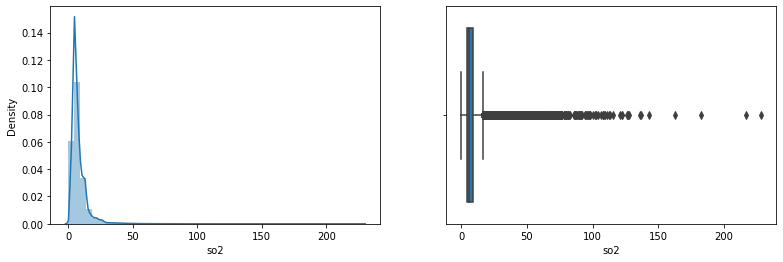

Skewness =  5.945593643831621


In [31]:
print('Distribution of SO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['so2'].dropna() , ax=ax[0])
sns.boxplot(df['so2'].dropna() , ax=ax[1])

so2_skew = df['so2'].skew()
plt.show()
print('Skewness = ',so2_skew)

Removing Outliers

In [32]:
Q1=df['so2'].quantile(0.25)
Q3=df['so2'].quantile(0.75)
IQR=Q3-Q1
df=df[~((df['so2']<(Q1-1.5*IQR))|(df['so2']>(Q3+1.5*IQR)))]

Distribution of SO2


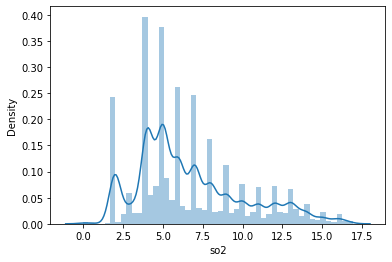

Skewness =  0.8221234148593459


In [33]:
print('Distribution of SO2')
sns.distplot(df['so2'].dropna())

so2_skew = df['so2'].skew()
plt.show()
print('Skewness = ',so2_skew)

Treating Missing Values

In [34]:
print('The number of missing values in SO2 are : ' , df['so2'].isna().sum())

The number of missing values in SO2 are :  7406


Distribution of SO2


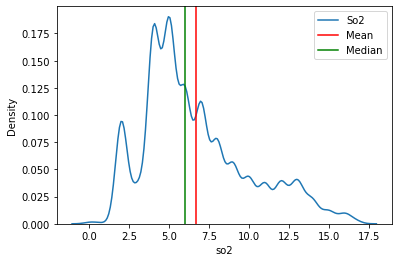

In [35]:
print('Distribution of SO2')
sns.kdeplot(df['so2'].dropna())
plt.axvline(df['so2'].mean(), color='r')
plt.axvline(df['so2'].median(), color='g')

plt.legend(['So2','Mean','Median'])
plt.show()

In [36]:
df1= df.copy()
df2=df.copy()

Mean Imputation

In [37]:
df1['so2'] = df1['so2'].fillna(df1['so2'].mean())

Forward Fill

In [38]:
df2['so2'] = df2['so2'].fillna(method='ffill')

Distribution of SO2


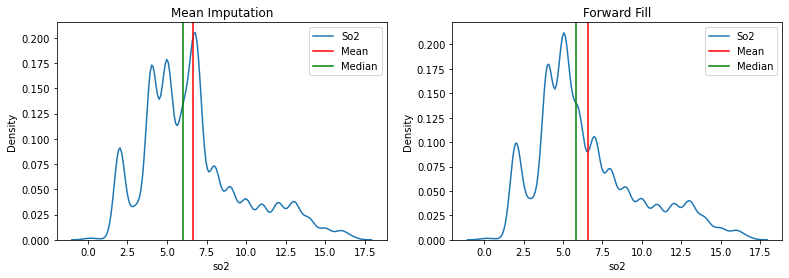

In [39]:
print('Distribution of SO2')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['so2'] , ax=ax[0])
ax[0].axvline(df1['so2'].mean(), color='r' )
ax[0].axvline(df1['so2'].median(), color='g')
ax[0].set_title('Mean Imputation')  
ax[0].legend(['So2','Mean','Median'])

sns.kdeplot(df2['so2'] , ax=ax[1])
ax[1].axvline(df2['so2'].mean(), color='r')
ax[1].axvline(df2['so2'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['So2','Mean','Median'])
                    
                    
plt.show()

The above plots show that filling the missing values with Forward Fill dosen't cause any variation on the data, so we can choose Forward Fill

In [40]:
df['so2'] = df['so2'].fillna(method='ffill')

'no2' - column

In [41]:
df['no2'].describe()

count    72703.000000
mean        21.919509
std         15.951587
min          0.000000
25%         12.900000
50%         17.000000
75%         26.300000
max        334.900000
Name: no2, dtype: float64

The above information shows that 75% of the values are within the value 30.8 and the maximum value is 334.90
This means that there are outliers

Distribution of NO2


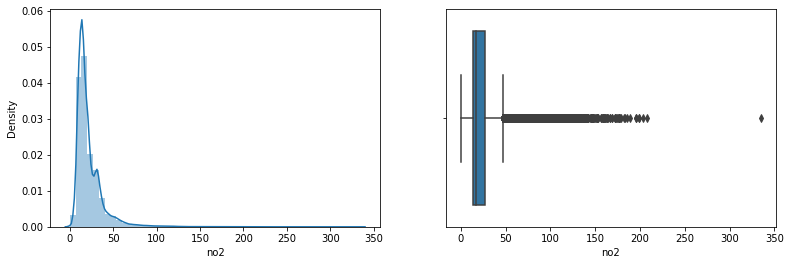

Skewness =  3.1966114326575585


In [42]:
print('Distribution of NO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['no2'].dropna() , ax=ax[0])
sns.boxplot(df['no2'].dropna() , ax=ax[1])
no2_skew = df['no2'].skew()
plt.show()
print('Skewness = ',no2_skew)

Removing Outliers

In [43]:
Q1=df['no2'].quantile(0.25)
Q3=df['no2'].quantile(0.75)
IQR=Q3-Q1
df=df[~((df['no2']<(Q1-1.5*IQR))|(df['no2']>(Q3+1.5*IQR)))]

Distribution of NO2


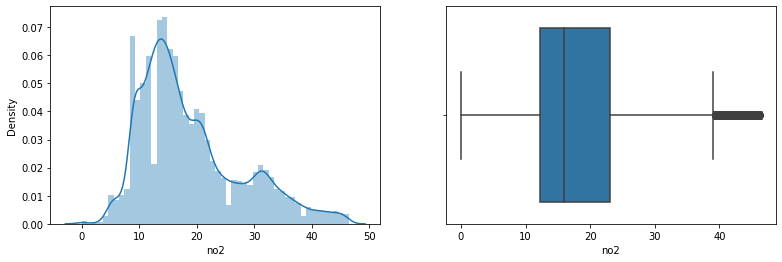

Skewness =  0.9356716924413435


In [44]:
print('Distribution of NO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['no2'].dropna() , ax=ax[0])
sns.boxplot(df['no2'].dropna() , ax=ax[1])
no2_skew = df['no2'].skew()
plt.show()
print('Skewness = ',no2_skew)

Treating Missing Values

In [45]:
print('The number of missing values in NO2 are : ' , df['no2'].isna().sum())

The number of missing values in NO2 are :  2992


Distribution of NO2


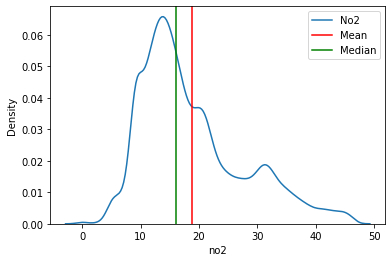

In [46]:
print('Distribution of NO2')
sns.kdeplot(df['no2'])
plt.axvline(df['no2'].mean(), color='r')
plt.axvline(df['no2'].median(), color='g')
plt.legend(['No2','Mean','Median'])
plt.show()

In [47]:
df1 = df.copy()
df2 = df.copy()

In [48]:
#Mean Imputation
df1['no2'] = df1['no2'].fillna(df1['no2'].mean())
#Forward Fill
df2['no2'] = df2['no2'].fillna(method='ffill')

Distribution of NO2


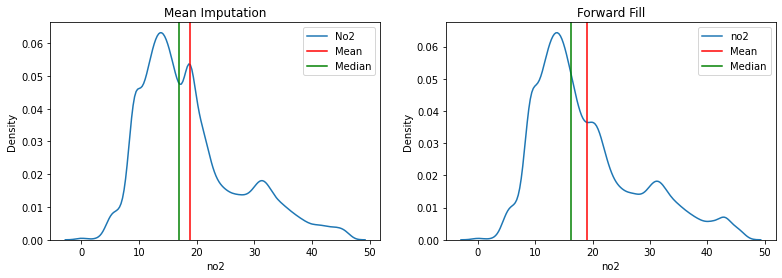

In [49]:
print('Distribution of NO2')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['no2'] , ax=ax[0])
ax[0].axvline(df1['no2'].mean(), color='r' )
ax[0].axvline(df1['no2'].median(), color='g')
ax[0].set_title('Mean Imputation')    
ax[0].legend(['No2','Mean','Median'])

sns.kdeplot(df2['no2'] , ax=ax[1])
ax[1].axvline(df2['no2'].mean(), color='r')
ax[1].axvline(df2['no2'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['no2','Mean','Median'])
                    
                    
plt.show()

In [50]:
df['no2'] = df['no2'].fillna(method='ffill')

'rspm' - column


In [51]:
df['rspm'].describe()

count    66630.000000
mean        90.191195
std         54.255667
min          0.000000
25%         55.000000
50%         79.000000
75%        110.000000
max        790.000000
Name: rspm, dtype: float64

The above information shows that 75% of the values are within the value 110.0 and the maximum value is 790.00
This means that there are outliers

Distribution of RSPM


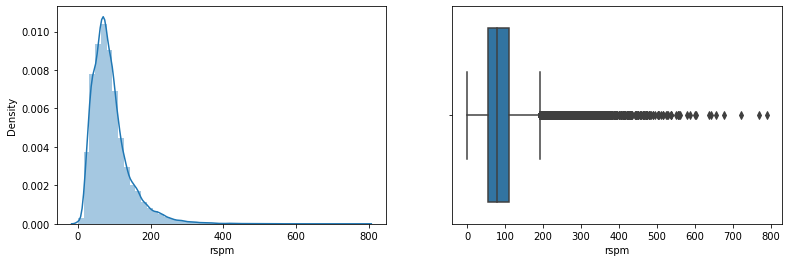

Skewness =  2.054389240795923


In [52]:
print('Distribution of RSPM')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['rspm'].dropna() , ax=ax[0])
sns.boxplot(df['rspm'].dropna() , ax=ax[1])
plt.show()
print('Skewness = ',df['rspm'].skew())

Removing Outliers

In [53]:
Q1=df['rspm'].quantile(0.25)
Q3=df['rspm'].quantile(0.75)
IQR=Q3-Q1
df=df[~((df['rspm']<(Q1-1.5*IQR))|(df['rspm']>(Q3+1.5*IQR)))]

Distribution of RSPM


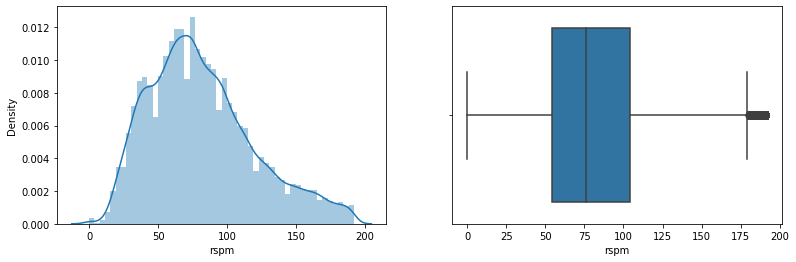

Skewness =  0.648238311325767


In [54]:
print('Distribution of RSPM')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['rspm'].dropna() , ax=ax[0])
sns.boxplot(df['rspm'].dropna() , ax=ax[1])
plt.show()
print('Skewness = ',df['rspm'].skew())

The above plots show that significant Positiv Skwewness is reduced and the outliers are removed

Treating Missing Values

In [55]:
print('The number of missing values in RSPM are : ' , df['rspm'].isna().sum())

The number of missing values in RSPM are :  4445


In [56]:
df1 = df.copy()
df2 = df.copy()

In [57]:
#Mean Imputation
df1['rspm'] = df1['rspm'].fillna(df1['rspm'].mean())
#Forward Fill
df2['rspm'] = df2['rspm'].fillna(method='ffill')

Distribution of RSPM


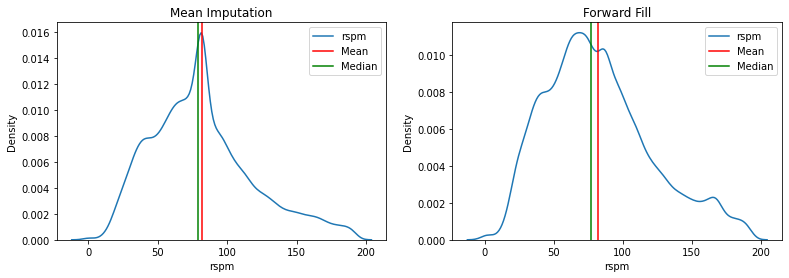

In [58]:
print('Distribution of RSPM')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['rspm'] , ax=ax[0])
ax[0].axvline(df1['rspm'].mean(), color='r' )
ax[0].axvline(df1['rspm'].median(), color='g')
ax[0].set_title('Mean Imputation')    
ax[0].legend(['rspm','Mean','Median'])

sns.kdeplot(df2['rspm'] , ax=ax[1])
ax[1].axvline(df2['rspm'].mean(), color='r')
ax[1].axvline(df2['rspm'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['rspm','Mean','Median'])
                    
                    
plt.show()